In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
def open_df(name):
    data=open(name,'rt')
    df_data=pd.read_csv(data,low_memory=False)
    return df_data

In [3]:
df_1=open_df('../데이터/01_제공데이터_update(210811)/01_음식물쓰레기_FOOD_WASTE_210811_update.CSV')

In [4]:
df_2_1=pd.read_csv('../데이터/01_제공데이터_update(210811)/02-1_내국인유동인구_KOREAN.CSV',encoding='euc-kr')

In [5]:
df_2_2=open_df('../데이터/01_제공데이터_update(210811)/02-2_장기체류 외국인 유동인구_LONG_TERM_FRGN.CSV')

In [6]:
df_4=open_df('../데이터/01_제공데이터_update(210811)/04_음식관련 카드소비_CARD_SPENDING.CSV')

In [7]:
df_2_3=open_df('../데이터/01_제공데이터_update(210811)/02-3_단기체류 외국인 유동인구_SHORT_TERM_FRGN.CSV')
df_3=open_df('../데이터/01_제공데이터_update(210811)/03_거주인구_RESIDENT_POP.CSV')

In [8]:
df_1["base_date"]=pd.to_datetime(df_1['base_date'])
df_1['Year']=df_1['base_date'].dt.year
df_1['Month']=df_1['base_date'].dt.month
df_2_1["base_date"]=pd.to_datetime(df_2_1['base_date'])
df_2_1['Year']=df_2_1['base_date'].dt.year
df_2_1['Month']=df_2_1['base_date'].dt.month
df_2_2["base_date"]=pd.to_datetime(df_2_2['base_date'])
df_2_2['Year']=df_2_2['base_date'].dt.year
df_2_2['Month']=df_2_2['base_date'].dt.month
df_2_3["base_date"]=pd.to_datetime(df_2_3['base_date'])
df_2_3['Year']=df_2_3['base_date'].dt.year
df_2_3['Month']=df_2_3['base_date'].dt.month

# 유동인구 데이터

## 누적 막대그래프를 이용한 유동인구 데이터

### 거주인구, 근무인구, 방문인구(내국인, 장기체류, 단기체류 구분 없음)

<ipython-input-9-abc814ca25f0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  연도별내국인거주유동인구=df_2_1[df_2_1['resd']=='제주'].groupby(['Year'])['resd_pop_cnt','work_pop_cnt','visit_pop_cnt'].sum()
<ipython-input-9-abc814ca25f0>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  연도별내국인관광유동인구=df_2_1[df_2_1['resd']=='그외'].groupby(['Year'])['work_pop_cnt','visit_pop_cnt'].sum()
<ipython-input-9-abc814ca25f0>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  연도별장기체류외국인유동인구=df_2_2.groupby(['Year'])['resd_pop_cnt','work_pop_cnt','visit_pop_cnt'].sum()


<AxesSubplot:ylabel='Year'>

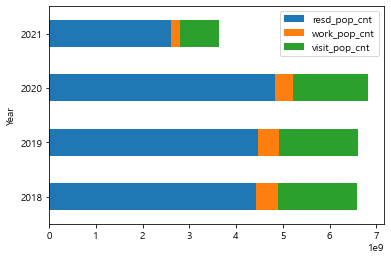

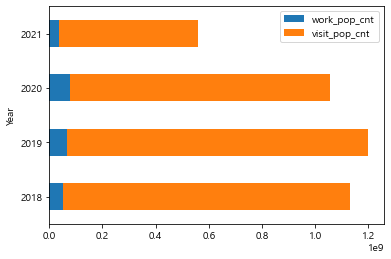

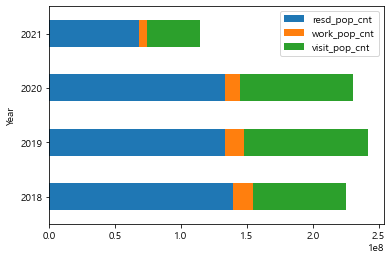

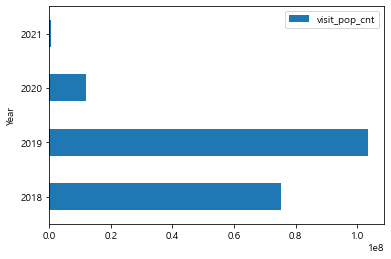

In [9]:
연도별내국인거주유동인구=df_2_1[df_2_1['resd']=='제주'].groupby(['Year'])['resd_pop_cnt','work_pop_cnt','visit_pop_cnt'].sum()
연도별내국인관광유동인구=df_2_1[df_2_1['resd']=='그외'].groupby(['Year'])['work_pop_cnt','visit_pop_cnt'].sum()
연도별장기체류외국인유동인구=df_2_2.groupby(['Year'])['resd_pop_cnt','work_pop_cnt','visit_pop_cnt'].sum()
연도별단기체류외국인유동인구=pd.DataFrame(df_2_3.groupby(['Year'])['visit_pop_cnt'].sum())

#누적막대그래프
연도별내국인거주유동인구.plot(kind="barh",stacked=True)
연도별내국인관광유동인구.plot(kind="barh",stacked=True)
연도별장기체류외국인유동인구.plot(kind="barh",stacked=True)
연도별단기체류외국인유동인구.plot(kind="barh",stacked=True)

In [10]:
연도별유동인구총합=pd.concat([연도별내국인거주유동인구,연도별내국인관광유동인구,연도별장기체류외국인유동인구,연도별단기체류외국인유동인구])
연도별유동인구총합=연도별유동인구총합.fillna(0)
연도별유동인구총합_df=연도별유동인구총합.groupby(['Year'])['resd_pop_cnt','work_pop_cnt','visit_pop_cnt'].sum()
연도별유동인구총합_df

<ipython-input-10-53bb63243932>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  연도별유동인구총합_df=연도별유동인구총합.groupby(['Year'])['resd_pop_cnt','work_pop_cnt','visit_pop_cnt'].sum()


,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
Year,,,
2018,4.567631e+09,5.320153e+08,2.912026e+09
2019,4.608218e+09,5.341879e+08,3.011777e+09
2020,4.962676e+09,4.733263e+08,2.686271e+09
2021,2.667908e+09,2.377611e+08,1.397095e+09


Text(0.5, 1.0, '연도별 유동인구 총합')

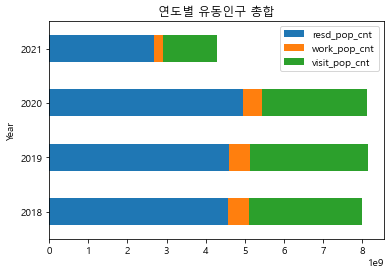

In [11]:
연도별유동인구총합_df.plot(kind="barh",stacked=True)
plt.title('연도별 유동인구 총합')

### 세부적으로 모두 구분("내국인_거주","내국인_근무","내국인_방문","장기체류_거주","장기체류_근무","장기체류_방문","단기체류_방문")

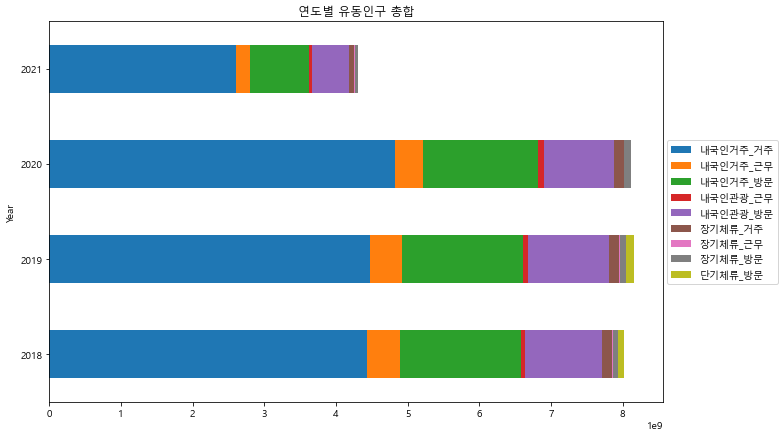

In [12]:
연도별유동인구총합=pd.concat([연도별내국인거주유동인구,연도별내국인관광유동인구,연도별장기체류외국인유동인구,연도별단기체류외국인유동인구],axis=1)
연도별유동인구총합=연도별유동인구총합.fillna(0)
연도별유동인구총합.columns=["내국인거주_거주","내국인거주_근무","내국인거주_방문","내국인관광_근무","내국인관광_방문","장기체류_거주","장기체류_근무","장기체류_방문","단기체류_방문"]
연도별유동인구총합.plot(kind="barh",stacked=True,figsize=(11,7))
plt.title("연도별 유동인구 총합")
plt.legend(bbox_to_anchor=(1.195,0.7))
plt.show()